<a href="https://colab.research.google.com/github/kaz-taka-1/2-02_tag/blob/main/3%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
project = '100knock-process-visualization'
chapter = 3
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# ３章 時系列データの加工・可視化１０本ノック

## ノック４１：時系列データを読み込んでみよう

In [3]:
from glob import glob
files = glob('data/person_count_1sec/out_0001/*.csv')
files.sort()
files[:5]

['data/person_count_1sec/out_0001/person_count_out_0001_2021011509.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011510.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011511.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011512.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011513.csv']

In [4]:
import pandas as pd
data = pd.read_csv(files[0])
display(data.head(5))
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id               int64
place            int64
receive_time    object
sensor_num       int64
in1              int64
out1             int64
state1           int64
in2              int64
out2             int64
state2           int64
dtype: object


In [5]:
data['receive_time'] = pd.to_datetime(data['receive_time'])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


In [6]:
data = pd.read_csv(files[0],parse_dates=["receive_time"])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


In [7]:
data=[]
for f in files:
  tmp=pd.read_csv(f,parse_dates=["receive_time"])
  data.append(tmp)
data=pd.concat(data,ignore_index=True)
display(data.head())
len(data)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


2346162

## ノック４２：日付の範囲を確認しよう

In [8]:
min_receive_time=data['receive_time'].min()
max_receive_time=data['receive_time'].max()
print(min_receive_time)
print(max_receive_time)

2021-01-15 09:00:00.144000
2021-02-14 17:59:59.956000


In [9]:
print(data['receive_time'].max()-data['receive_time'].min())

30 days 08:59:59.812000


## ノック４３：日毎のデータ件数を確認しよう

In [10]:
data['receive_date']=data['receive_time'].dt.date
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15


In [11]:
daily_count=data[['receive_date','id']].groupby('receive_date',as_index=False).count()
daily_count.head()

,receive_date,id
0,2021-01-15,50166
1,2021-01-16,75699
2,2021-01-17,73198
3,2021-01-18,78365
4,2021-01-19,78348


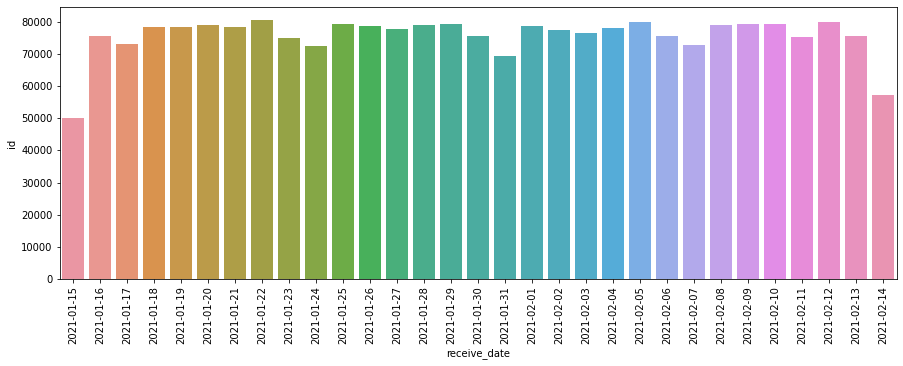

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x=daily_count['receive_date'],y=daily_count["id"])

## ノック４４：日付から曜日を算出しよう

In [13]:
data['dayofweek']=data['receive_time'].dt.dayofweek
data['day_name']=data['receive_time'].dt.day_name()
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15,4,Friday
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15,4,Friday
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15,4,Friday
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15,4,Friday
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15,4,Friday


In [14]:
data[['receive_date','dayofweek','day_name']].drop_duplicates(subset='receive_date').head()

,receive_date,dayofweek,day_name
0,2021-01-15,4,Friday
50166,2021-01-16,5,Saturday
125865,2021-01-17,6,Sunday
199063,2021-01-18,0,Monday
277428,2021-01-19,1,Tuesday


## ノック４５：特定範囲のデータに絞り込もう

In [15]:
import datetime as dt
data_extract=data.loc[(data['receive_time']>=dt.datetime(2021,1,20))&(data['receive_time']<dt.datetime(2021,1,23))].copy()
display(data_extract.head())
display(data_extract.tail())

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday


,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593584,2624,1,2021-01-22 23:58:36.927,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday


## ノック４６：秒単位のデータを作成しよう

In [16]:
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.round('S')
data_extract.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:42
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


In [17]:
print(len(data_extract))
print(len(data_extract['receive_time_sec'].unique()))

237809
237807


In [18]:
data_extract[data_extract['receive_time_sec'].duplicated(keep=False)].head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578874,887,1,2021-01-22 19:15:06.530,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08
578877,890,1,2021-01-22 19:15:08.424,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08


In [19]:
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.floor('S')
display(data_extract.head())
print(len(data_extract))
print(len(data_extract['receive_time_sec'].unique()))

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:40
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


237809
237808


In [20]:
data_extract[data_extract['receive_time_sec'].duplicated(keep=False)].head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07


In [21]:
data_extract = data_extract.drop_duplicates(subset=['receive_time_sec'])
min_receive_time = data_extract['receive_time_sec'].min()
max_receive_time = data_extract['receive_time_sec'].max()
print(len(data_extract))
print(f'{min_receive_time}から{max_receive_time}')

237808
2021-01-20 00:00:40から2021-01-22 23:58:36


## ノック４７：秒単位のデータを整形しよう

In [22]:
print(pd.date_range('2021-01-15','2021-01-16',freq='S'))

DatetimeIndex(['2021-01-15 00:00:00', '2021-01-15 00:00:01',
               '2021-01-15 00:00:02', '2021-01-15 00:00:03',
               '2021-01-15 00:00:04', '2021-01-15 00:00:05',
               '2021-01-15 00:00:06', '2021-01-15 00:00:07',
               '2021-01-15 00:00:08', '2021-01-15 00:00:09',
               ...
               '2021-01-15 23:59:51', '2021-01-15 23:59:52',
               '2021-01-15 23:59:53', '2021-01-15 23:59:54',
               '2021-01-15 23:59:55', '2021-01-15 23:59:56',
               '2021-01-15 23:59:57', '2021-01-15 23:59:58',
               '2021-01-15 23:59:59', '2021-01-16 00:00:00'],
              dtype='datetime64[ns]', length=86401, freq='S')


In [23]:
base_data=pd.DataFrame({'receive_time_sec':pd.date_range(min_receive_time,max_receive_time,freq='S')})
display(base_data.head())
display(base_data.tail())
print(len(base_data))

,receive_time_sec
0,2021-01-20 00:00:40
1,2021-01-20 00:00:41
2,2021-01-20 00:00:42
3,2021-01-20 00:00:43
4,2021-01-20 00:00:44


,receive_time_sec
259072,2021-01-22 23:58:32
259073,2021-01-22 23:58:33
259074,2021-01-22 23:58:34
259075,2021-01-22 23:58:35
259076,2021-01-22 23:58:36


259077


In [24]:
data_base_extract=pd.merge(base_data,data_extract,on='receive_time_sec',how='left')
display(data_base_extract.head())
display(data_base_extract.isna().sum())

,receive_time_sec,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,2021-01-20 00:00:40,0.0,1.0,2021-01-20 00:00:40.839,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
1,2021-01-20 00:00:41,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
2,2021-01-20 00:00:42,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-20 00:00:43,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-20 00:00:44,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


receive_time_sec        0
id                  21269
place               21269
receive_time        21269
sensor_num          21269
in1                 21269
out1                21269
state1              21269
in2                 21269
out2                21269
state2              21269
receive_date        21269
dayofweek           21269
day_name            21269
dtype: int64

## ノック４８：秒間の欠損データを処理しよう

In [25]:
data_base_extract.sort_values('receive_time_sec',inplace=True)
data_base_extract=data_base_extract.fillna(method='ffill')
data_base_extract.head()

,receive_time_sec,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,2021-01-20 00:00:40,0.0,1.0,2021-01-20 00:00:40.839,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
1,2021-01-20 00:00:41,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
2,2021-01-20 00:00:42,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
3,2021-01-20 00:00:43,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
4,2021-01-20 00:00:44,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday


## ノック４９：通った人数を可視化しよう

In [26]:
data_analytics=data_base_extract[['receive_time_sec','in1','out1']].copy()
data_analytics.head()

,receive_time_sec,in1,out1
0,2021-01-20 00:00:40,12109.0,11302.0
1,2021-01-20 00:00:41,12109.0,11302.0
2,2021-01-20 00:00:42,12109.0,11302.0
3,2021-01-20 00:00:43,12109.0,11302.0
4,2021-01-20 00:00:44,12109.0,11302.0


In [27]:
data_before_1sec=data_analytics.shift(1)
data_before_1sec.head()

,receive_time_sec,in1,out1
0,NaT,NaN,NaN
1,2021-01-20 00:00:40,12109.0,11302.0
2,2021-01-20 00:00:41,12109.0,11302.0
3,2021-01-20 00:00:42,12109.0,11302.0
4,2021-01-20 00:00:43,12109.0,11302.0


In [28]:
data_before_1sec.columns=['receive_time_sec_b1sec','in1_b1sec', 'out1_b1sec']
data_analytics=pd.concat([data_analytics,data_before_1sec],axis=1)
data_analytics.head()

,receive_time_sec,in1,out1,receive_time_sec_b1sec,in1_b1sec,out1_b1sec
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0


In [29]:
data_analytics['in1_calc'] = data_analytics['in1'] - data_analytics['in1_b1sec'] 
data_analytics['out1_calc'] = data_analytics['out1'] - data_analytics['out1_b1sec'] 
data_analytics.head()

,receive_time_sec,in1,out1,receive_time_sec_b1sec,in1_b1sec,out1_b1sec,in1_calc,out1_calc
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN,NaN,NaN
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0,0.0,0.0
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0,0.0,0.0
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0,0.0,0.0
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0,0.0,0.0


In [30]:
data_analytics['date_hour'] = data_analytics['receive_time_sec'].dt.strftime('%Y%m%d%H')
data_analytics.head()

,receive_time_sec,in1,out1,receive_time_sec_b1sec,in1_b1sec,out1_b1sec,in1_calc,out1_calc,date_hour
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN,NaN,NaN,2021012000
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0,0.0,0.0,2021012000
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0,0.0,0.0,2021012000
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0,0.0,0.0,2021012000
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0,0.0,0.0,2021012000


In [31]:
viz_data = data_analytics[['date_hour','in1_calc','out1_calc']].groupby('date_hour',as_index=False).sum()
viz_data = pd.melt(viz_data, id_vars='date_hour', value_vars=['in1_calc', 'out1_calc'])
viz_data.head()

,date_hour,variable,value
0,2021012000,in1_calc,3.0
1,2021012001,in1_calc,1.0
2,2021012002,in1_calc,1.0
3,2021012003,in1_calc,0.0
4,2021012004,in1_calc,1.0


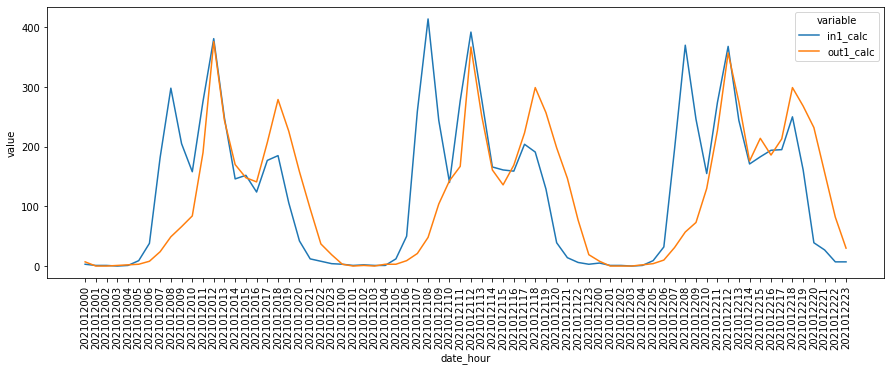

In [32]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x=viz_data['date_hour'], y=viz_data["value"], hue=viz_data['variable'])

## ノック５０：移動平均を計算して可視化しよう

In [37]:
vix_data = data_analytics[['date_hour','in1_calc','out1_calc']].groupby('date_hour',as_index=False).sum()
viz_data.head(10)

,date_hour,variable,value
0,2021012000,in1_calc,3.0
1,2021012001,in1_calc,1.0
2,2021012002,in1_calc,1.0
3,2021012003,in1_calc,0.0
4,2021012004,in1_calc,1.0
5,2021012005,in1_calc,9.0
6,2021012006,in1_calc,38.0
7,2021012007,in1_calc,182.0
8,2021012008,in1_calc,298.0
9,2021012009,in1_calc,205.0


In [38]:
viz_data_rolling = viz_data[['in1_calc','out1_calc']].rolling(3).mean()
viz_data_rolling.head(10)

KeyError: ignored